In [13]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import os

In [2]:
# import matplotlib as rc


### Font

In [3]:
# font = {'family': 'DejaVu Sans',
#         'color':  'black',
#         'weight': 'bold',
#         'size': 16,
#         }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 12,
        }

inside_font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 6,
        }

def get_font(size):
    return {'family': 'DejaVu Sans',
        'color':  'black',
        'size': size,
        }

# Color

(0.5, 2)

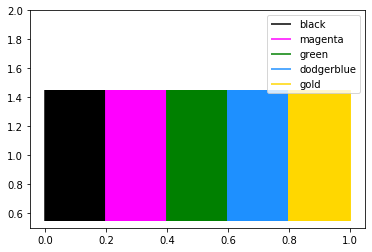

In [4]:
# digonto vai nature paper
colors = ['black', 'magenta', 'green', 'deepskyblue', 'orange']

colors = ['black', 'magenta', 'green', 'dodgerblue', 'gold']

# ok 1
# colors = ['black', 'purple', 'magenta', 'green', 'dodgerblue', 'orange', 'gold']

spikes = np.linspace(0, 1, 2000)
size=spikes.shape[0]//len(colors)

for a in range(len(colors)):
    plt.eventplot(spikes[a*size:(a+1)*size], orientation='horizontal', linelengths=0.9, color = colors[a], label=colors[a])
    pass
# plt.show()
plt.legend()
plt.ylim([0.5,2])

## defined fundtions

In [5]:
def plot_one(pc, one_by_nu, beta_by_nu):
    for L in data.keys():
        p, y1, y2 = data[L].T

        x = (p-pc)*L**(one_by_nu)
        y = y1*L**(beta_by_nu)
        plt.plot(x, y, label='L={}'.format(L))

        pass

In [6]:
def plot_for(pc, one_by_nu, beta_by_nu):

    f = plt.figure(figsize=(20, 10))

    f.add_subplot(1, 2, 1)
    plot_one(pc, one_by_nu, beta_by_nu)
    plt.xlim(-2, 0)
    plt.ylim(0, 1)
    plt.legend()

    f.add_subplot(1, 2, 2)
    plot_one(pc, one_by_nu, beta_by_nu)
    plt.xlim(.5, 2.5)
    plt.ylim(1, 1.4)
    plt.legend()
    
    f.text(0.2, 0.2, 'pc={},1/nu={},beta/nu={},one/nu={}'.format(pc, one_by_nu, beta_by_nu, one_by_nu), fontdict=font)
    
    out_file_name = out_img_dir + 'tuning/' + signature
    out_file_name += '_order-parameter-largest_pc{:0.4f}_beta_{:0.3f}_nu_{:0.3f}.png'.format(pc, beta_by_nu, one_by_nu)
    
    print(out_file_name)
    plt.savefig(out_file_name)

### directories

In [11]:
out_img_dir = "../figures/"
in_data_dir = "../data/site-percolation/"

#### signatures

In [19]:
signature = 'sq_lattice_site_percolation_periodic_'
files = glob.glob(in_data_dir + signature + '*[000-999]*txt')

# print("chosen signature")
print(signature)

sq_lattice_site_percolation_periodic_


In [20]:
files

['../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L300_avg.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L150_avg.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L250_avg.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L200_avg.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L400_avg.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L350_avg.txt',
 '../data/site-percolation/sq_lattice_site_percolation_periodic__entropy_order_L100_avg.txt']

In [21]:
## lengths to consider
lengths = np.arange(200, 450, 50)

In [23]:
data = dict()
ensembles = dict()
for file in files:
    with open(file) as f:
    
        line = f.readline()
        if line[0] == '#':
            line=line[1:]
        header = json.loads(line)
    print(header)
    L = int(header['length'])
    ensmbl = int(header['ensemble_size'])
    if L in ensembles:
        ensembles[L] += ensmbl
    else:
        ensembles[L] = ensmbl

    p, P1, P2 = np.loadtxt(file, usecols=(0,2,3), skiprows=1, unpack=True)
    
    if L in data:
        data[L] += ensmbl*np.array([p, P1, P2]).T
    else:
        data[L] = ensmbl*np.array([p, P1, P2]).T
        
    pass

        
#### taking average
for L in ensembles.keys():
    data[L] = data[L]/ensembles[L]      
    pass

{'length': 300, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.39'}
{'length': 150, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.31'}
{'length': 250, 'ensemble_size': 30000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.35'}
{'length': 200, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.33'}
{'length': 400, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.54'}
{'length': 350, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.47'}
{'length': 100, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_', 'datetime': '2019.11.17_10.30.29'}


## With standard deviation

In [27]:

# data = dict()
# deviation_data = dict()
# ensembles = dict()
# for file in files:
#     f = open(file)
#     l = f.readline()
    
#     header = json.loads(l)
#     print(header)
#     L = int(header['length'])
#     ensmbl = int(header['ensemble_size'])
#     if L in ensembles:
#         ensembles[L] += ensmbl
#     else:
#         ensembles[L] = ensmbl

#     p, P1, P2 = np.loadtxt(file, usecols=(0,2,3), skiprows=1, unpack=True)
#     a = P2.reshape(P2.shape[0], 1)

#     if L in data:
#         data[L] += ensmbl*np.array([p, P1, P2]).T        
#         deviation_data[L] = np.append(deviation_data[L], a, axis=1)
# #         print(deviation_data[L])
# #         break
#     else:
#         data[L] = ensmbl*np.array([p, P1, P2]).T
#         deviation_data[L] = a
        
#     pass


# #### taking average
# for L in ensembles.keys():
#     data[L] = data[L]/ensembles[L]      
#     pass

{'length': 350, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 250, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 100, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 250, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 10000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 200, 'ensemble_size': 20000, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 10000, 'signature': 'sq_latti

In [19]:
# L = 400
# print(deviation_data[L].shape)
# e = np.std(deviation_data[L], axis=1)
# print(e.shape)
# p = np.linspace(0, 1, L**2)
# plt.plot(b, e)

# c = np.linspace(0, L**2-1, 10, dtype=int)
# plt.plot(p[c], e[c])
# plt.title('Standard Deviation')
# plt.xlabel('p')
# plt.ylabel('std(P)')
# print(np.max(s))

In [20]:
P2 = data[L][:,2]
print(P2.shape)
print(p.shape)
print(e.shape)
plt.plot(p, P2)
plt.errorbar(p[c], P2[c], e[c], linestyle='None', marker='^')

(160000,)
(22500,)


NameError: name 'e' is not defined

### checking ensemble size

In [12]:
ensembles

{350: 20000,
 400: 20000,
 250: 30000,
 100: 20000,
 300: 20000,
 200: 20000,
 150: 20000}

(0.5, 0.7)

/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


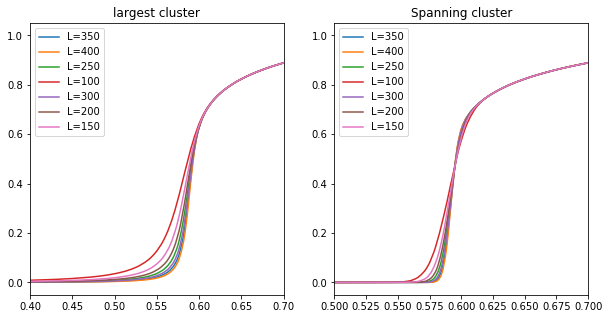

In [13]:
fig = plt.figure(figsize=(10, 5))


fig.add_subplot(1, 2, 1)
for L in data.keys():
    x, y1, y2 = data[L].T
    plt.plot(x, y1, label='L={}'.format(L))
    
    pass

plt.legend()
plt.xlim(0.4, 0.7)
plt.title("largest cluster")

fig.add_subplot(1, 2, 2)
for L in data.keys():
    x, y1, y2 = data[L].T
    plt.plot(x, y2, label='L={}'.format(L))
    
    pass

plt.title("Spanning cluster")
plt.legend()
plt.xlim(0.5, 0.7)

### defined constants

In [24]:

pc = 0.5927
one_by_nu = 0.75

In [14]:
.102/.75

0.13599999999999998

## Finding exponet from log-log plot

In [25]:
def get_heights(one_by_nu, at_x):
    fig = plt.figure(figsize=(5,5), dpi=100)
    height_data = []
    for L in lengths:
        p, y1, y2 = data[L].T

        x = (p-pc)*L**(one_by_nu)
        a = len(x[x<=at_x])
        print(a)
        y = y2
        height_data.append([L, y[a]])
        plt.plot(x, y, label='L={}'.format(L))
        plt.plot(x[a], y[a], 'o')
        pass
    plt.legend()
    plt.xlim(-5, 10)
    print(height_data)
    return height_data


In [35]:
at_x = 2

25212
39031
55840
75633
98409
[[200, 0.781011], [250, 0.7643527], [300, 0.7508635], [350, 0.7396445], [400, 0.729909]]
[[ 5.29831737 -0.24716604]
 [ 5.52146092 -0.26872595]
 [ 5.70378247 -0.2865314 ]
 [ 5.85793315 -0.30158561]
 [ 5.99146455 -0.31483541]]
LinregressResult(slope=-0.09758914186722932, intercept=0.27000965027753643, rvalue=-0.9999899840305152, pvalue=3.805157995625287e-08, stderr=0.0002521770897197831)
beta/nu  0.09758914186722932
beta 0.13011885582297242


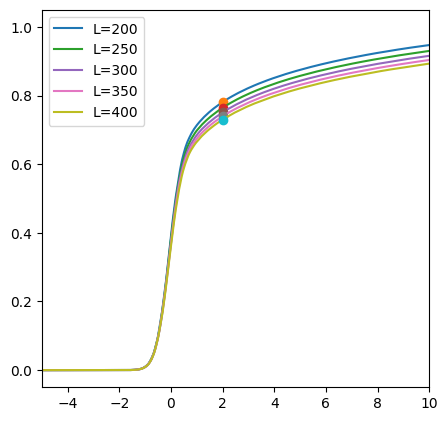

In [36]:
heights = get_heights(one_by_nu, at_x)
heights = np.log(heights)
print(heights)
regress = stats.linregress(heights[:,0], heights[:,1])
print(regress)
print("beta/nu ", abs(regress[0]))
print("beta", abs(regress[0])/one_by_nu)

../figures/sq_lattice_site_percolation_periodic_-spanning-_order_parameter-exponent_log_log-pc0.5927.eps


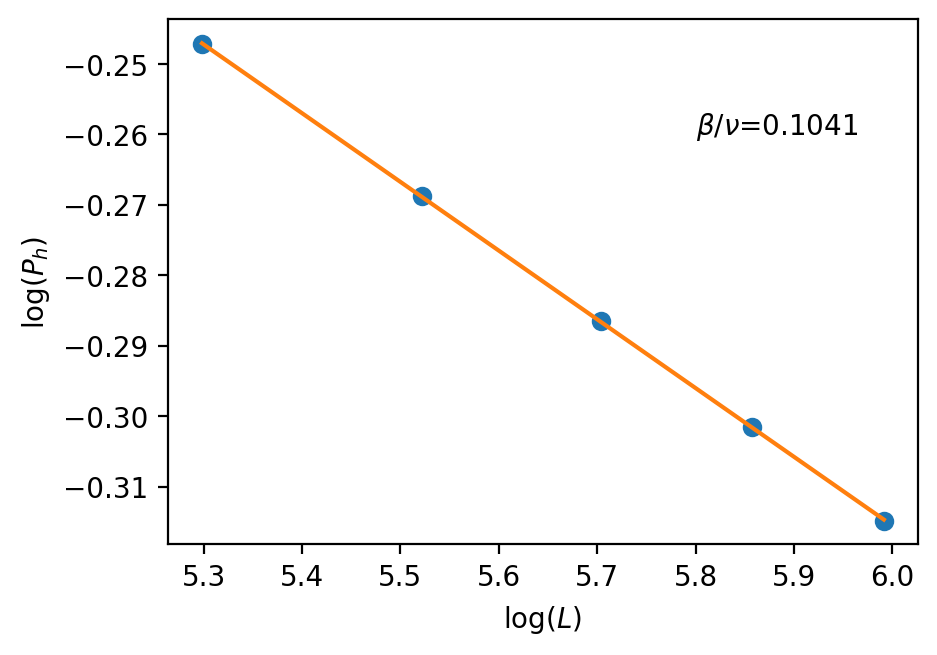

In [57]:
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
plt.plot(heights[:,0], heights[:,1], 'o')
x = np.linspace(np.min(heights[:,0]), np.max(heights[:,0]), 10)
y = x * regress[0] + regress[1]
plt.plot(x, y)
plt.text(5.8, -0.26, r"$\beta/\nu$={}".format(0.1041))
plt.xlabel(r"$\log(L)$")
plt.ylabel(r"$\log(P_h)$")
ax.set_position([0.15, 0.15, 0.75, 0.75])
out_file_name = out_img_dir + signature + '-spanning-'
out_file_name += '_order_parameter-exponent_log_log-pc{:.4f}.eps'.format(pc)
print(out_file_name)
plt.savefig(out_file_name)

In [28]:
beta = 5/36
nu = 4/3
print(beta / nu)

0.10416666666666667


## estimating exponent statistically

by spanning cluster


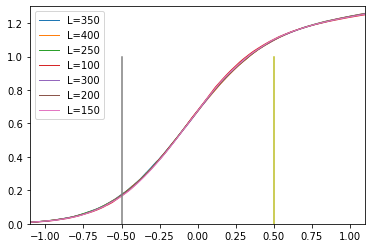

In [25]:
pc = 0.5927  # more accurate
one_by_nu = 0.75 # effect of new
beta_by_nu = 0.1041

print("by spanning cluster")
for L in data.keys():
    p, y1, y2 = data[L].T
    
    x = (p-pc)*L**(one_by_nu)
    y = y2*L**(beta_by_nu)
    plt.plot(x, y, label='L={}'.format(L), linewidth=1)
    pass
plt.legend() 
plt.xlim(-1.1,1.1)
plt.ylim(0, 1.3)

x1 = [-0.5, 0.5]

x = np.ones(5) * x1[0]
y = np.linspace(0, 1, 5)
plt.plot(x, y)

x = np.ones(5) * x1[1]
y = np.linspace(0, 1, 5)
plt.plot(x, y)

In [26]:
def find_deviation_in_range(one_by_nu, beta_by_nu, start=-1, stop=0.5, num=5):
    deviations = []
    for at_x in np.linspace(start, stop, num):
        heights = []
        for L in data.keys():
            p, y1, y2 = data[L].T

            x = (p-pc)*L**(one_by_nu)
            y = y2*L**(beta_by_nu)
            a = len(x[x <= at_x])
#             print(a)
#             print(x[a])
            heights.append([x[a], y[a]])
            pass

        heights = np.array(heights)
#         print(heights)
        ##now find max and min value of heights
        a = np.max(heights[:,1])
        b = np.min(heights[:,1])
        diff = a-b
#         print("max-min = ?")
#         print("{} - {} = {}".format(a, b, diff))
        deviations.append([at_x, diff])
#         deviations.append([at_x, np.std(heights[:,1])])
        pass
    return deviations

In [27]:
print("format : [exponent, x, deviation]")
deviations_for_different_exponent = []
for ex in np.linspace(0.09, 0.11, 20):
    devs = find_deviation_in_range(one_by_nu, ex, x1[0], x1[1], 30)
    deviations_for_different_exponent.append([ex, devs])
    pass
# deviations_for_different_exponent

format : [exponent, x, deviation]


In [28]:
## finding minimum standard deviation for exponent
stds = []
for a in deviations_for_different_exponent:
#     print(a)
    b = np.array(a[1])
#     print(b)
    stds.append([a[0], np.std(b[:,1])])
    pass
stds = np.array(stds)
print(stds)
m = np.argmin(stds[:,1])
print("minimum median for exponent")
print(stds[m])

[[0.09       0.00994355]
 [0.09105263 0.00946021]
 [0.09210526 0.00897624]
 [0.09315789 0.00847732]
 [0.09421053 0.00797324]
 [0.09526316 0.00746561]
 [0.09631579 0.00696492]
 [0.09736842 0.00647399]
 [0.09842105 0.00599918]
 [0.09947368 0.00554441]
 [0.10052632 0.00512019]
 [0.10157895 0.00470044]
 [0.10263158 0.0042711 ]
 [0.10368421 0.00391174]
 [0.10473684 0.00363446]
 [0.10578947 0.00345533]
 [0.10684211 0.00342933]
 [0.10789474 0.00348647]
 [0.10894737 0.003564  ]
 [0.11       0.003565  ]]
minimum median for exponent
[0.10684211 0.00342933]


In [53]:
# pc = 0.5782
# one_by_nu = 0.736 # 0.736, 0.739


# ## 1st convolution
# alpha_by_nu = 0.6712
# beta_by_nu = 0.1026
# gamma_by_nu = 0.6287


### estimated exponent


In [33]:
# pc = 0.5701  # more accurate
# one_by_nu = 0.721# effect of new

# ## 1st convolution
# alpha_by_nu = 0.6631 # fine tuning
# beta_by_nu = 0.0982 # fine tuning
# gamma_by_nu = 0.6362

In [20]:
print("beta = ", beta_by_nu / one_by_nu)

beta =  0.1388


### output graphs

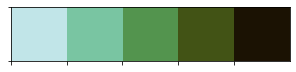

In [36]:
# n = 5
# palette = sns.cubehelix_palette(n_colors=n,start=1.2, light=0.85, dark=0.07, hue=1, gamma=0.95, rot=0.5)
# sns.palplot(palette)

In [37]:
# my_cmap = ListedColormap(sns.color_palette("cubehelix", 8).as_hex())
# sns.set()
# sns.set_palette(palette)

# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# sns.set_style(styles[4])

In [21]:
colors.reverse()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic_-spanning-_order_parameter-pc0.5927.eps


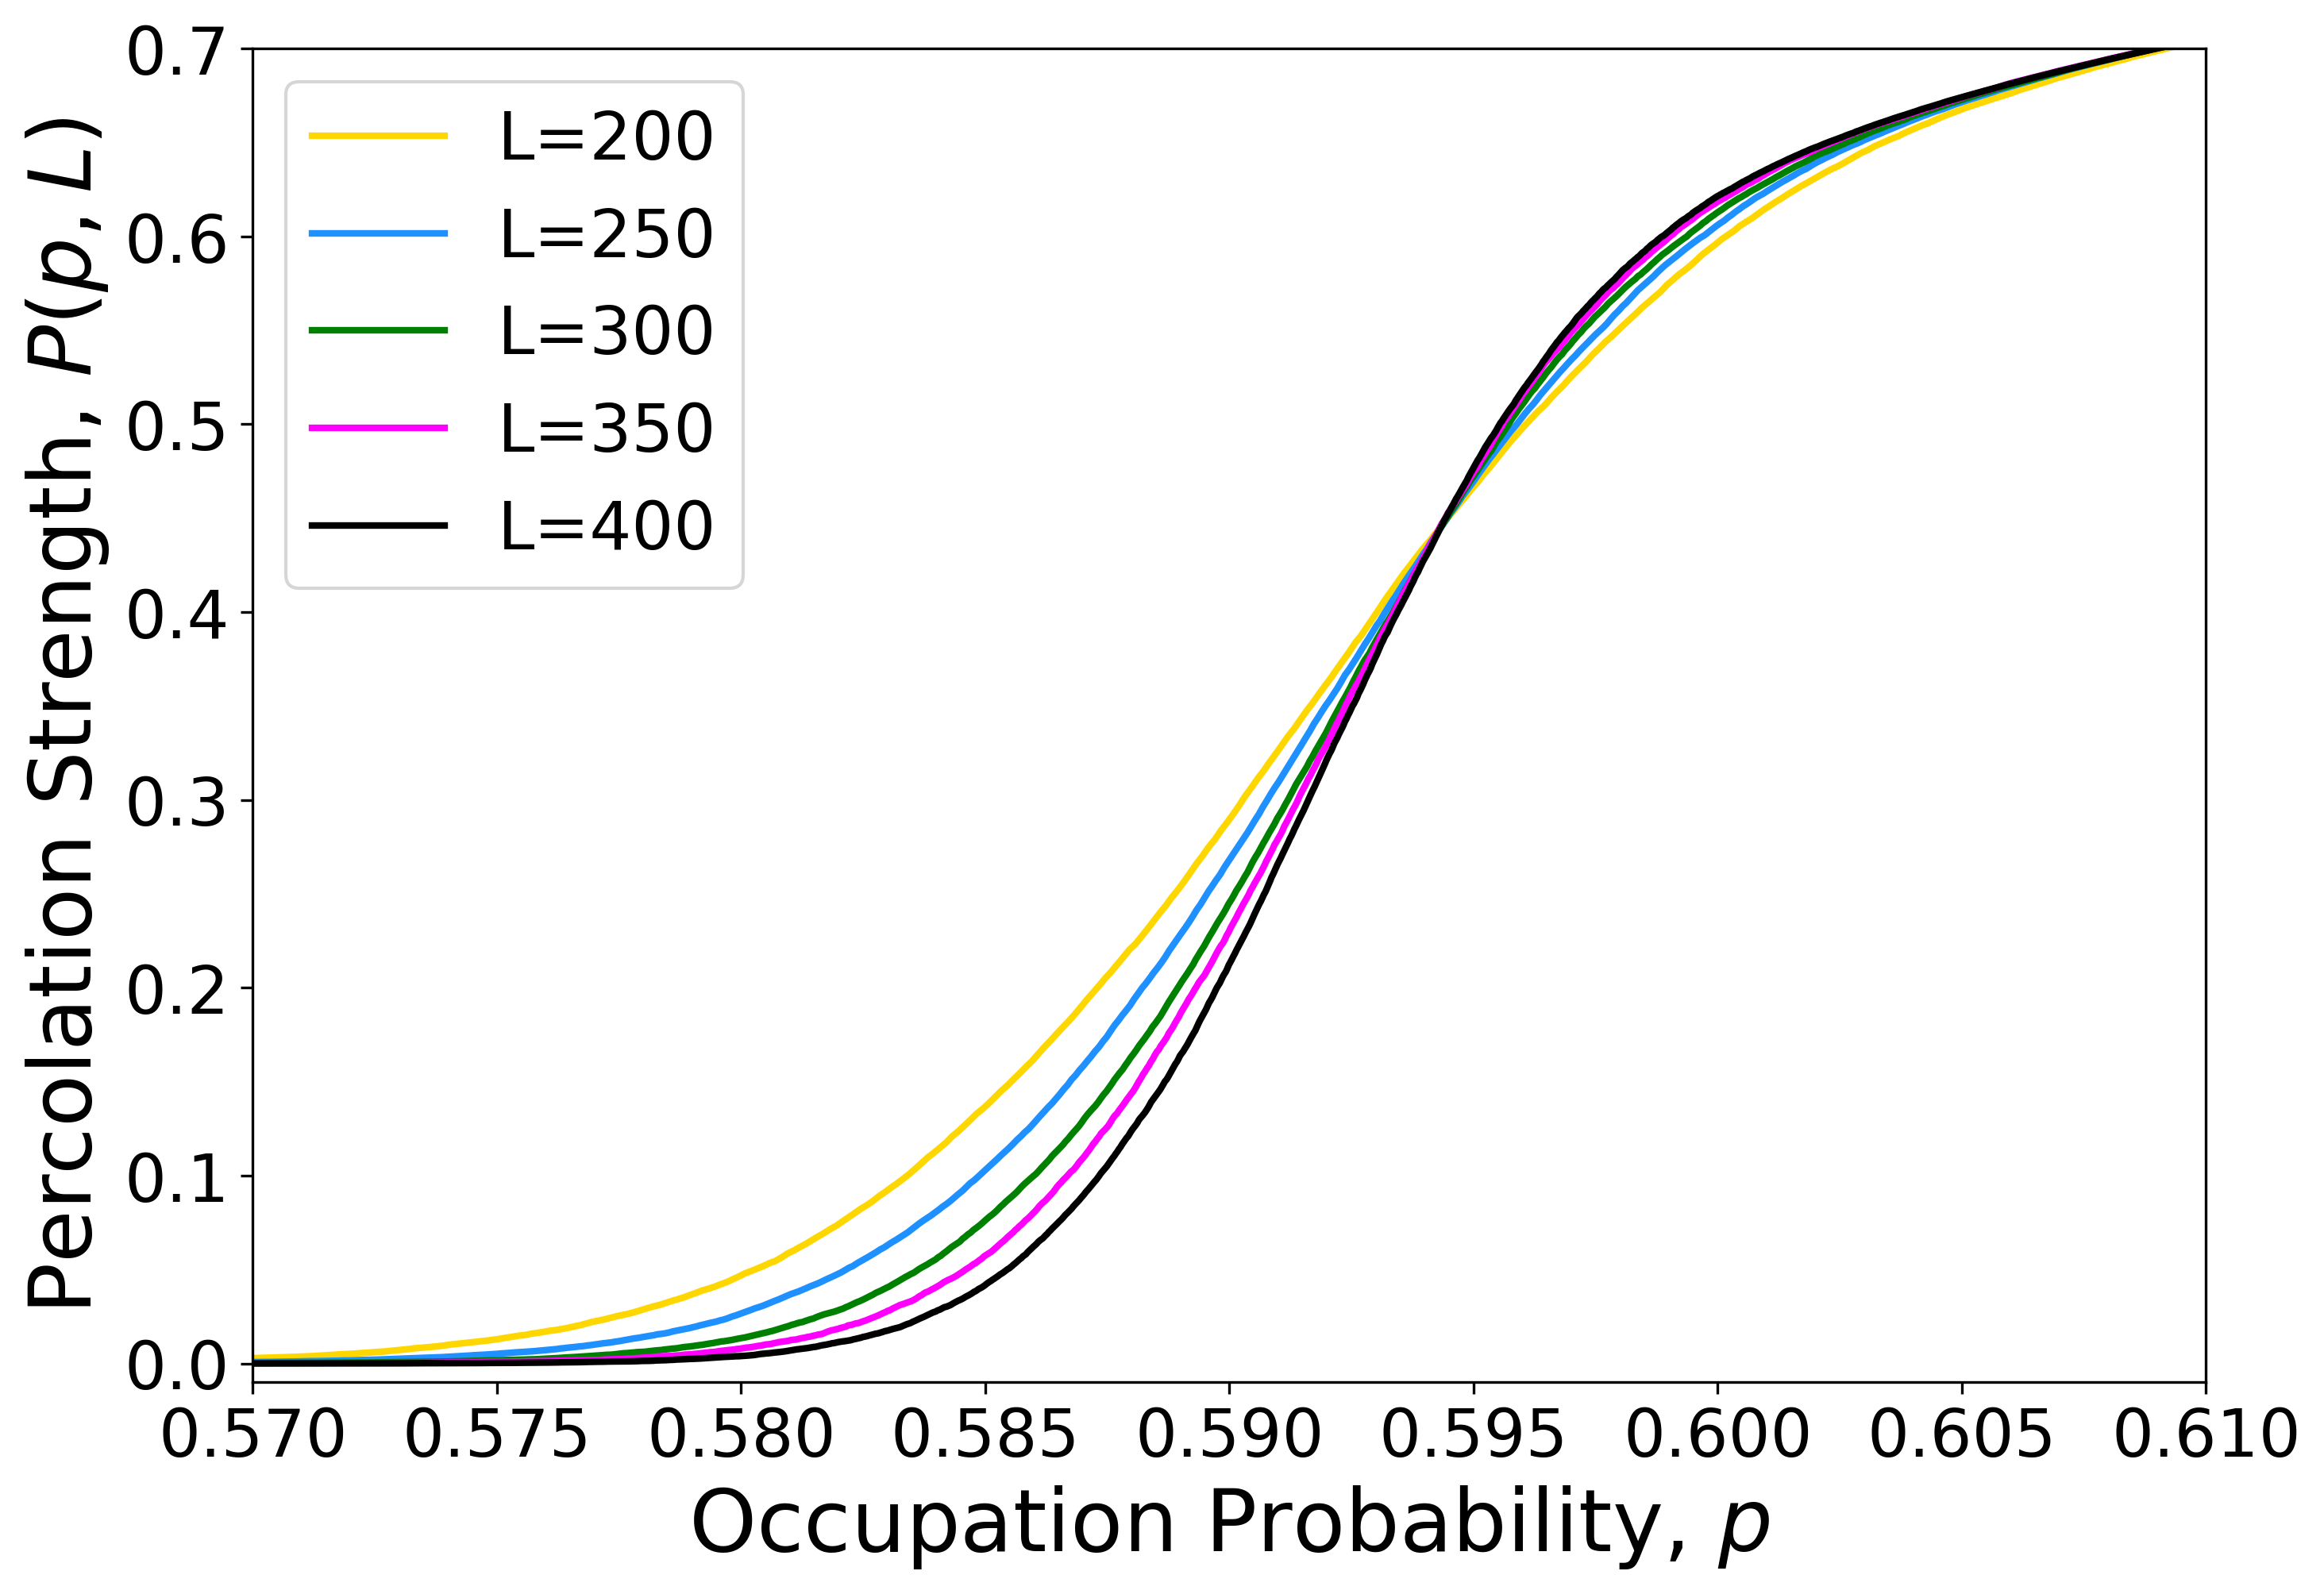

In [24]:

fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)

# ax_size = [0.12, 0.1, 0.82, 0.8]
# ax = fig.add_axes(ax_size)

# plt.margins(tight=True)
a = 0
for L in lengths:
    x, y1, y2 = data[L].T
    size = x.shape[0]
    indices = np.linspace(0, size-1, size // 5, dtype=int)
    ax.plot(x[indices], y2[indices], label='L={}'.format(L), color=colors[a], linewidth=2)
#     plt.plot(x[::-1], y2[::-1], label='L={}'.format(L))
    a += 1
    pass

ax.set_position([0.12, 0.14, 0.82, 0.8])
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.xlim(0.57, 0.61)
plt.ylim(-0.01, 0.7)

plt.xlabel(r'Occupation Probability, $p$', get_font(26))
plt.ylabel(r'Percolation Strength, $P(p,L)$', get_font(26))
# plt.title('Order Parameter', font)

out_file_name = out_img_dir + signature + '-spanning-'
out_file_name += '_order_parameter-pc{:.4f}.eps'.format(pc)
print(out_file_name)
plt.savefig(out_file_name)

### x-scaled

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic_-spanning-_order_parameter-x-scaled-pc0.5927.eps


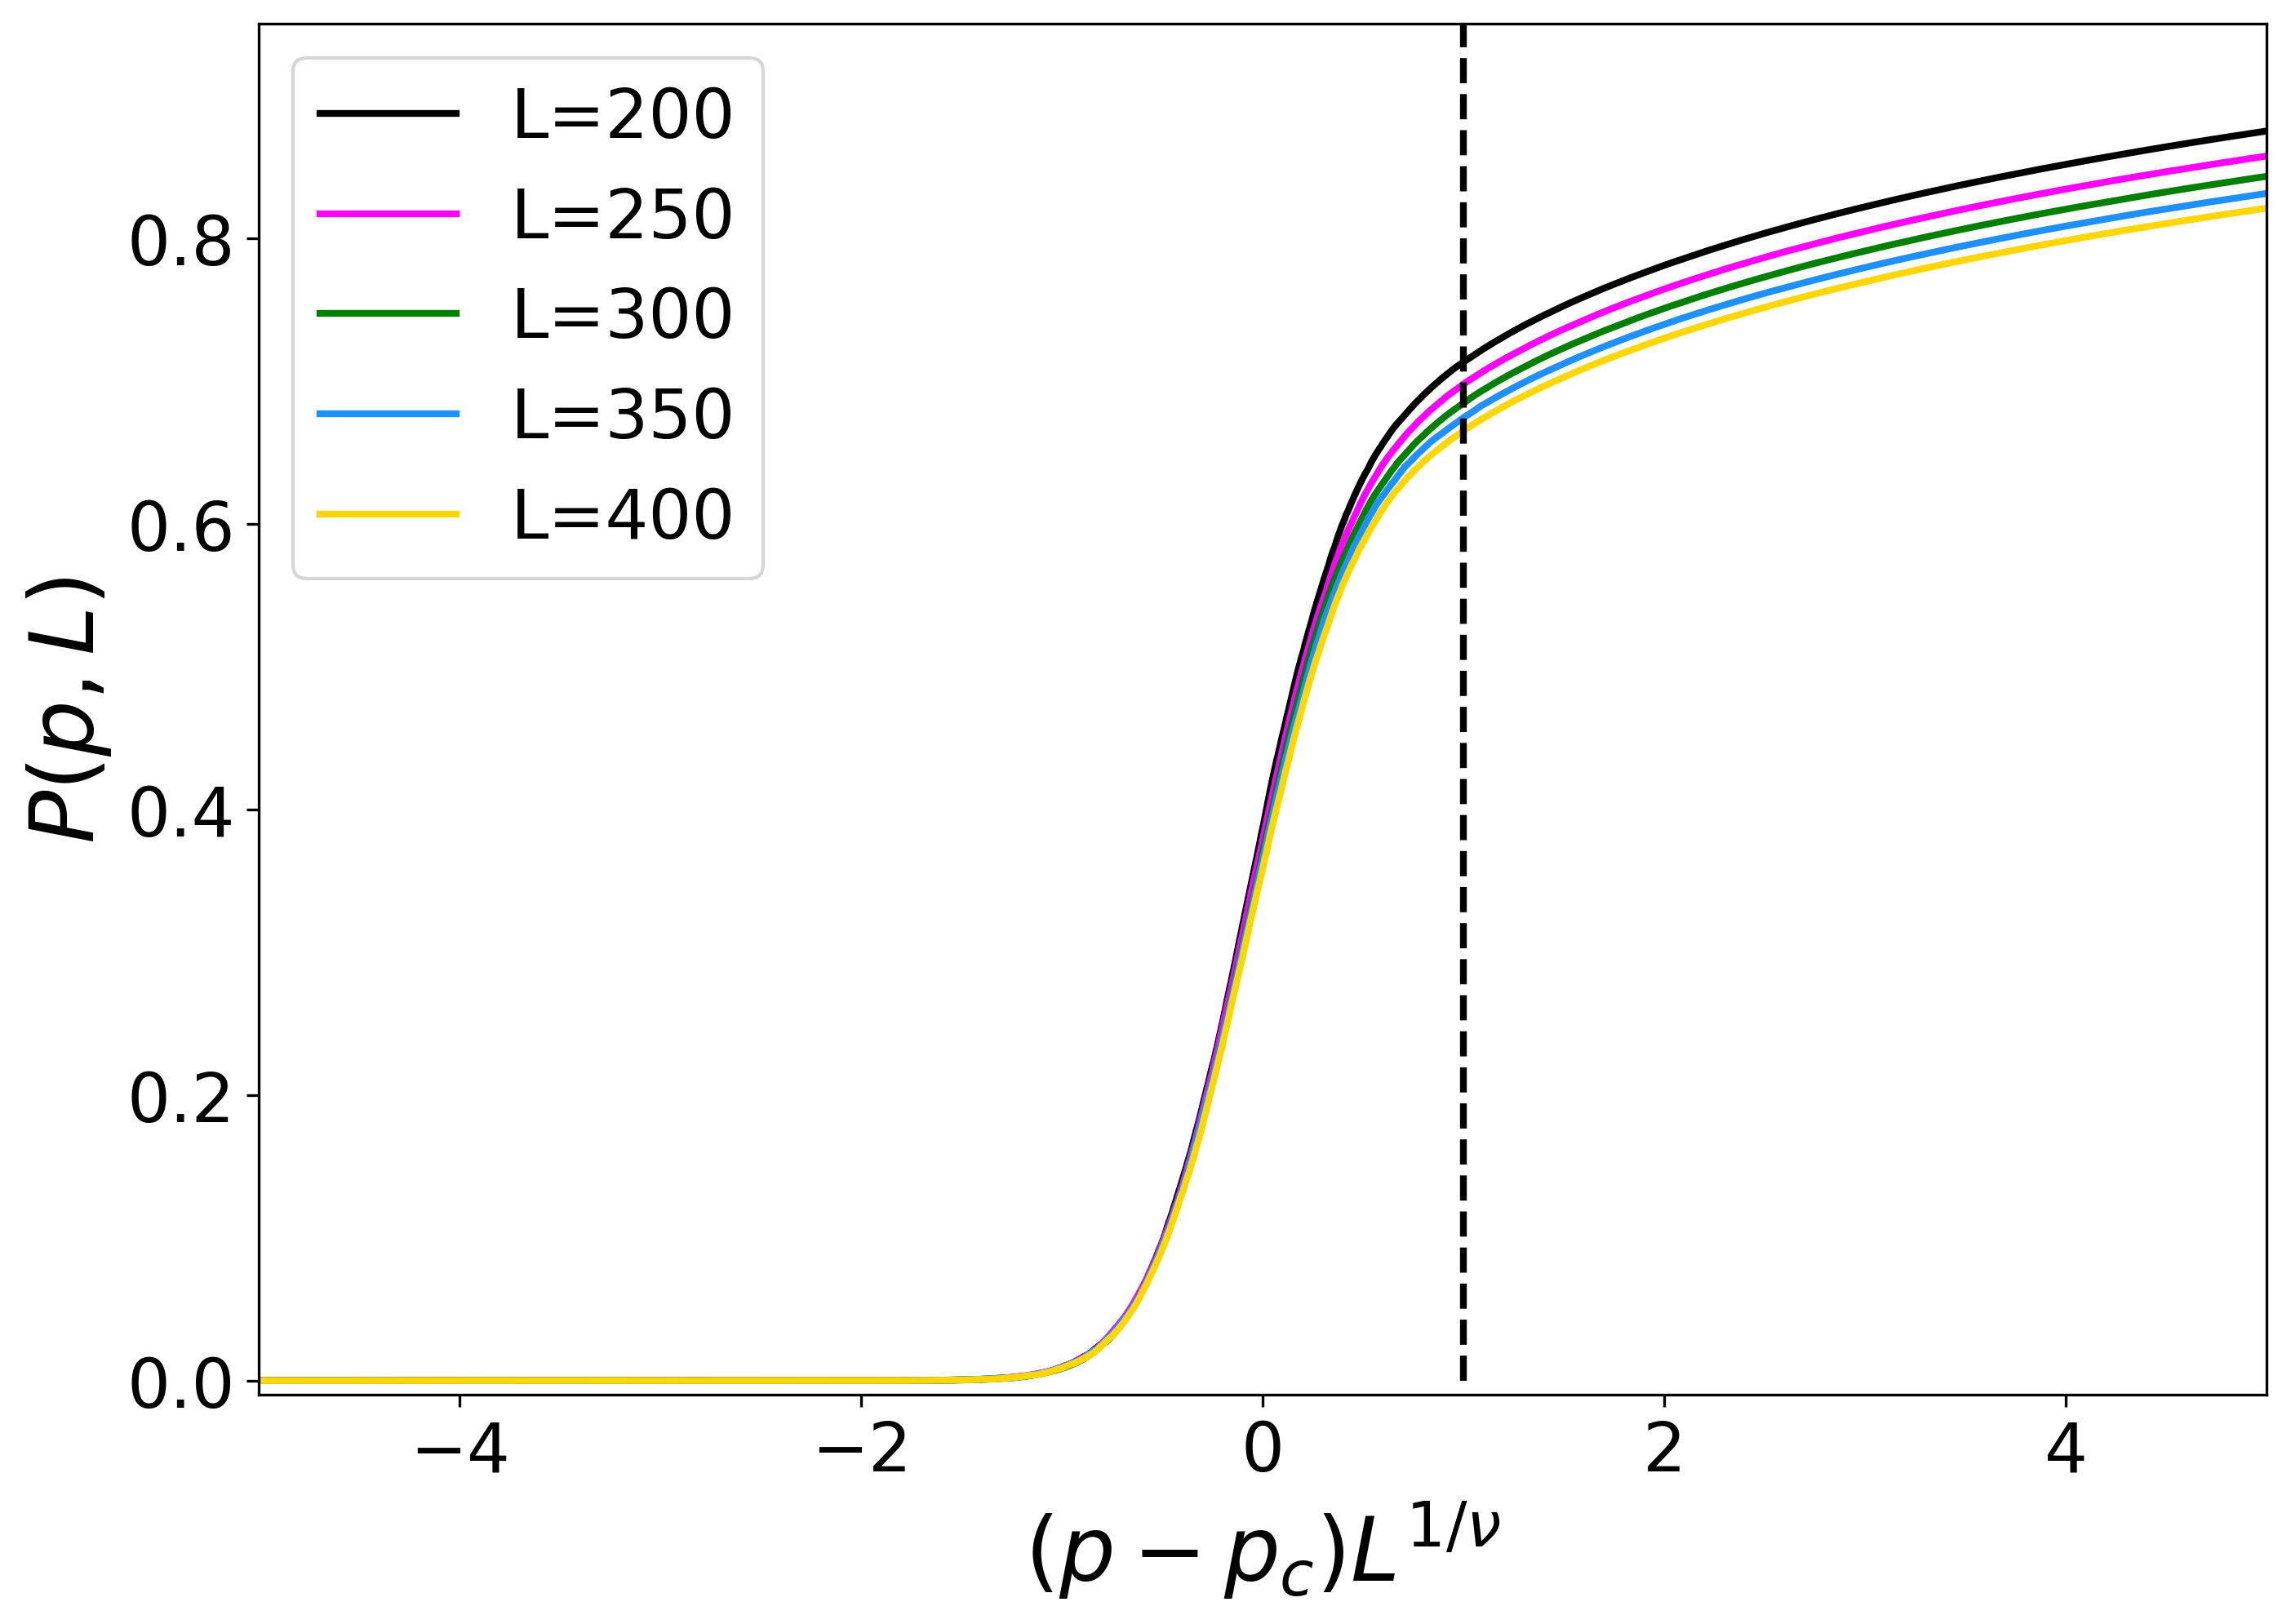

In [41]:
at_x = 1
fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)

# ax_size = [0.12, 0.1, 0.82, 0.8]
# ax = fig.add_axes(ax_size)

# plt.margins(tight=True)
a = 0
for L in lengths:
    p, P1, P2 = data[L].T
    x = (p-pc)*L**(one_by_nu)
    plt.plot(x, P2, label='L={}'.format(L), color=colors[a], linewidth=2)  # P2 for spanning cluster counting
    a += 1
    pass

plt.xlim(-5, 5)
plt.ylim(-0.01, 0.95)
x = np.ones(10)*at_x
y = np.linspace(0, 1, 10)
plt.plot(x, y, '--k', linewidth=2)

plt.xlabel(r'$(p-p_c)L^{1/\nu}$', get_font(26))
plt.ylabel(r'$P(p,L)$', get_font(26))
# plt.title('Order Parameter', font)

ax.set_position([0.12, 0.14, 0.82, 0.8])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc=0, fontsize=20, )


# fig.tight_layout(pad=0.7)


out_file_name = out_img_dir + signature + '-spanning-'
out_file_name += '_order_parameter-x-scaled-pc{:.4f}.eps'.format(pc)
print(out_file_name)
plt.savefig(out_file_name)

### Data collapse

In [59]:
pc, one_by_nu, beta_by_nu = 0.5927, 0.75, 0.1041

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic_-spanning--with-_order_parameter-data_collapse-pc0.5927_beta_0.104_nu_0.750.eps


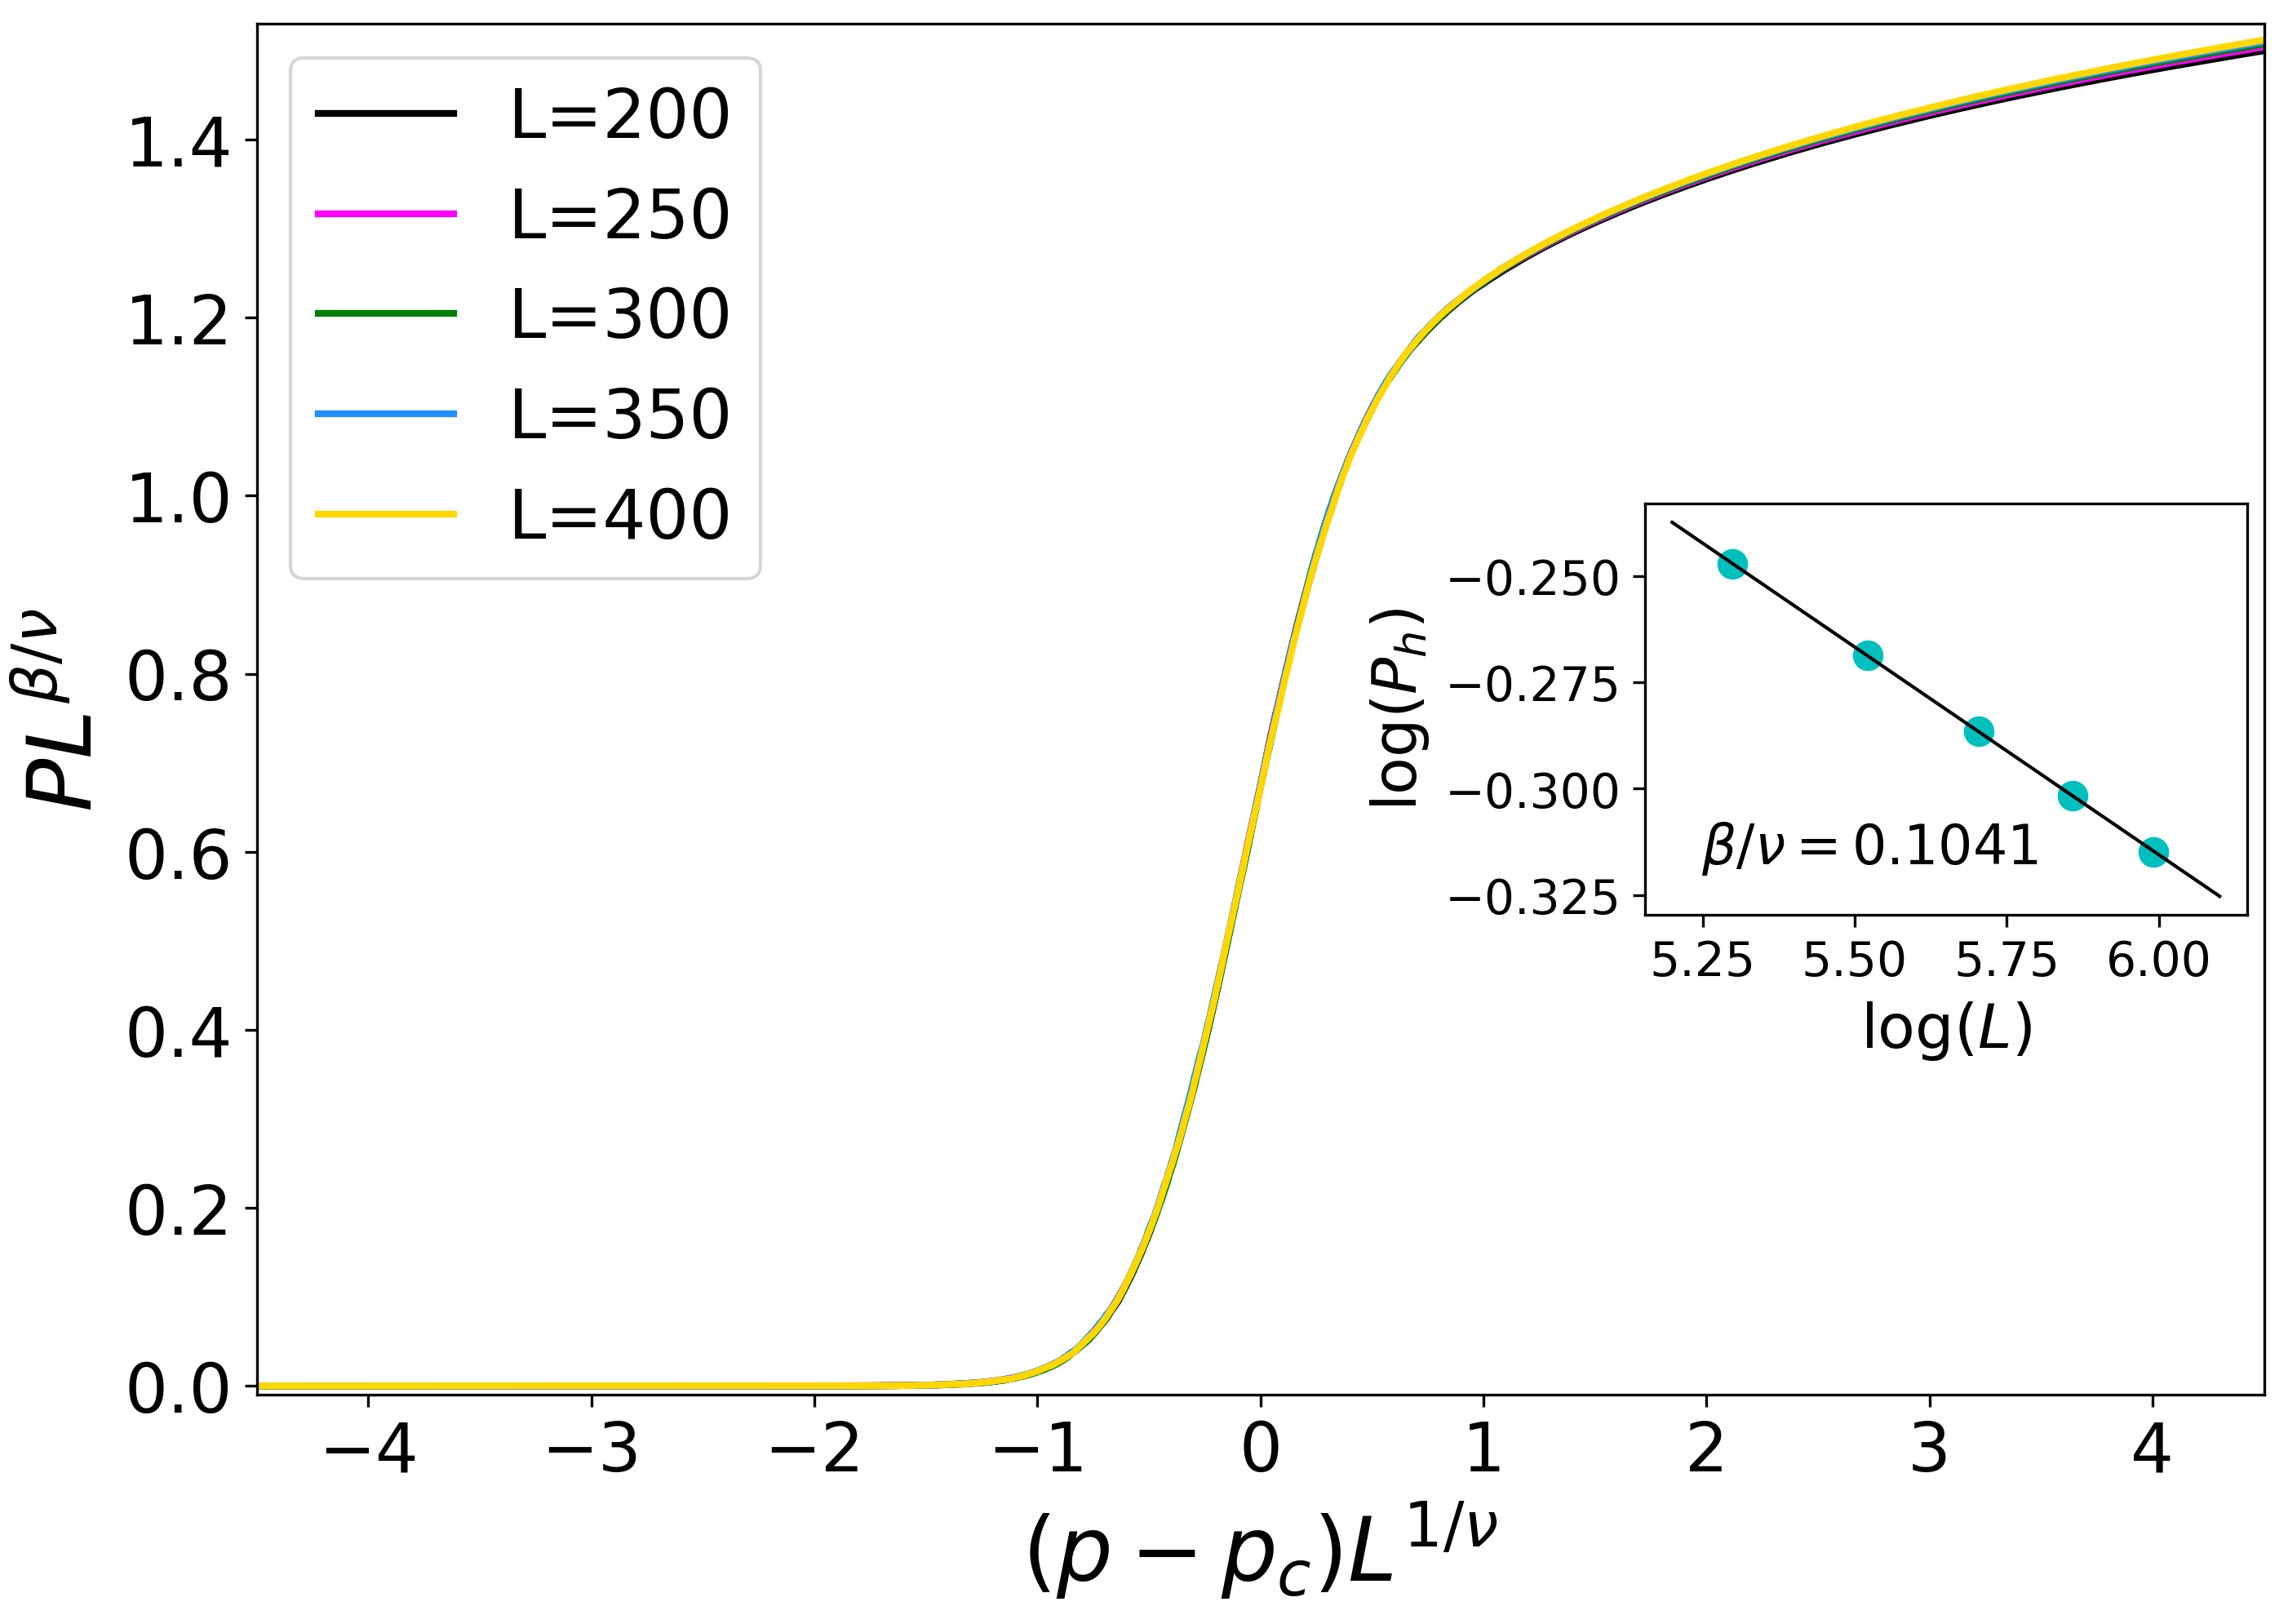

In [60]:
fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)
a = 0
for L in lengths:
    p, y1, y2 = data[L].T

    x = (p-pc)*L**(one_by_nu)
    y = y2*L**(beta_by_nu)
    plt.plot(x, y, label='L={}'.format(L), linewidth=2, color=colors[a])
    a += 1
    pass
# plt.xlim(-10, 10)
# plt.ylim(-0.01, 1.6)

plt.xlim(-4.5, 4.5)
plt.ylim(-0.01, 1.53)

plt.xlabel(r'$(p-p_c) L^{1/\nu}$', get_font(26))
plt.ylabel(r'$P L^{\beta/\nu}$', get_font(26))
# plt.title('Order Parameter Data Collapse', font)
ax.set_position([0.12, 0.14, 0.82, 0.8])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc=0, fontsize=20, )

# plotting exponent finding graph
i_axes = inset_axes(ax, 
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    #height=1, # height : 1 inch
                    loc=5)

plt.plot(heights[:,0], heights[:,1], 'oc', markersize=8)

x = np.linspace(5.2, 6.1, 10)
y = regress[0]*x + regress[1]
plt.plot(x, y, '-k', linewidth=1)

plt.xlabel(r'$\log(L)$', get_font(18))
plt.ylabel(r'$\log(P_h)$', get_font(18))

plt.tick_params(axis='both', which='major', labelsize=14)
#     fig.tight_layout(pad=0.7)
fig.text(0.71, 0.45, r"$\beta/\nu={:.4}$".format(beta_by_nu), get_font(16))


## saving to file
#     fig.text(0.2, 0.5, r'$p_c = {:.4f}, \beta/\nu = {:.3f}, 1/\nu = {:.3f}$'.format(pc, beta_by_nu, one_by_nu))
out_file_name = out_img_dir + signature + '-spanning-' + "-with-"
out_file_name += '_order_parameter-data_collapse-pc{:.4f}_beta_{:.3f}_nu_{:.3f}.eps'.format(pc, beta_by_nu, one_by_nu)
print(out_file_name)
plt.savefig(out_file_name)

In [34]:
a = np.array ([[1, 2, 3],
               [3, 4, 6]])
a = np.arange(10).reshape(10,1)
b = np.arange(10, 20).reshape(10,1)

In [35]:
a.shape

(10, 1)

In [36]:
np.std(a, axis=0)

array([2.87228132])

In [39]:
np.append(a, b, axis=1)

array([[ 0, 10],
       [ 1, 11],
       [ 2, 12],
       [ 3, 13],
       [ 4, 14],
       [ 5, 15],
       [ 6, 16],
       [ 7, 17],
       [ 8, 18],
       [ 9, 19]])